In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

from source_code.SqlCo import Sqldd

Autosave disabled
Local Sec Env loaded


In [2]:
# path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\data\Rapport'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=0, header=0)
#     li.append(df)
#     os.unlink(filename)

# frame = pd.concat(li, axis=0, ignore_index=True)
# frame

In [3]:
tip = Sqldd()
cnx, cursor = tip.get_bdd_co()
frame = pd.read_sql(f"SELECT * FROM cov_rapport;", con=cnx) 

In [11]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [12]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  34162.8496
RMSE =  132778.64533497245


In [13]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  525.99584
RMSE =  1549.15774618339


In [35]:
def visFollow(location,subject):
    df = frame[frame['location'].isin([f"{location}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {location} performances for {subject} --")
    MAPE = mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf = plt.title(f"{location}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(location):
    vv = frame[frame['location'].isin([f"{location}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(location):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{location}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{location}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(location)

-- World performances for cases --
MAE =  241170.99667774086
RMSE =  411390.67699282063
-- World performances for deaths --
MAE =  3335.156146179402
RMSE =  4768.3647865428175


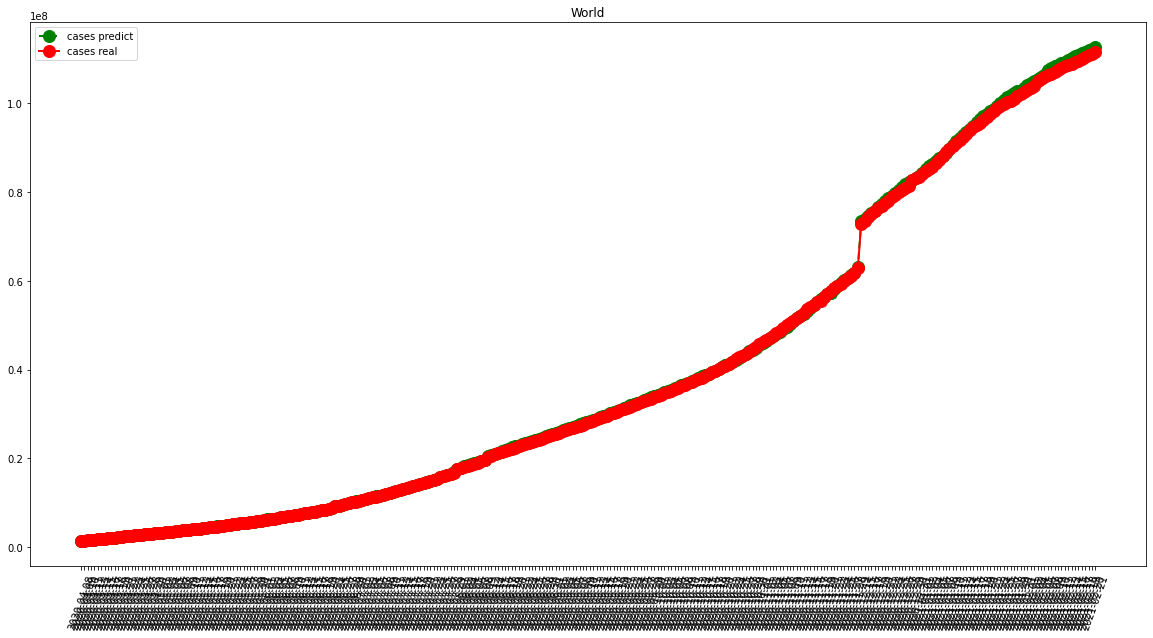

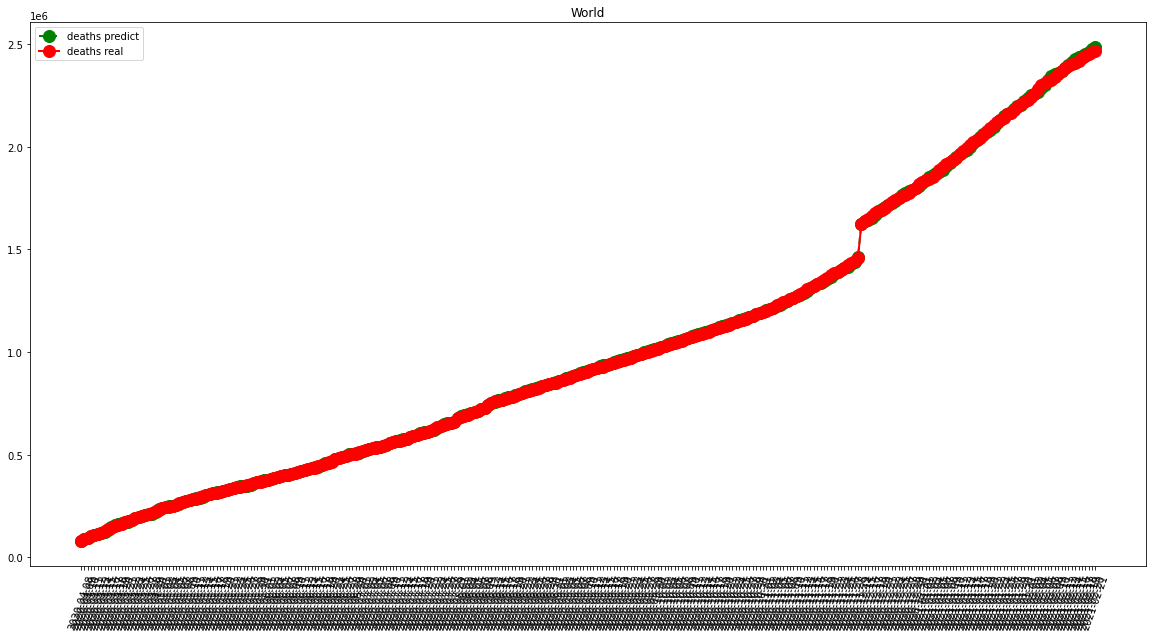

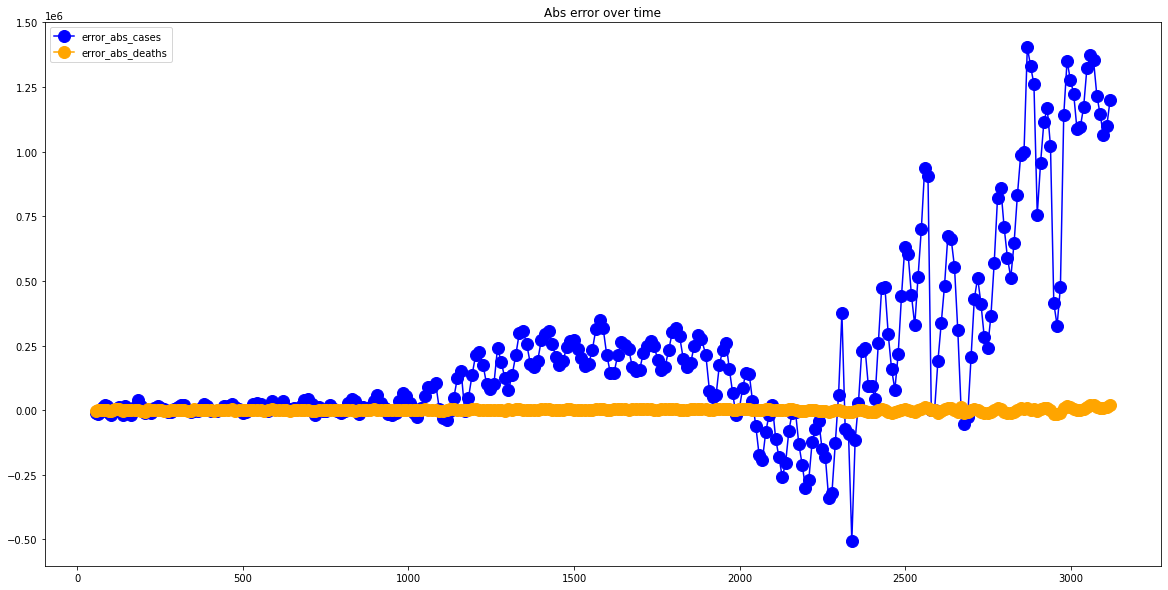

In [36]:
visShow("World")

-- France performances for cases --
MAE =  6192.20578778135
RMSE =  10521.478647627237
-- France performances for deaths --
MAE =  177.524115755627
RMSE =  305.5032640954763


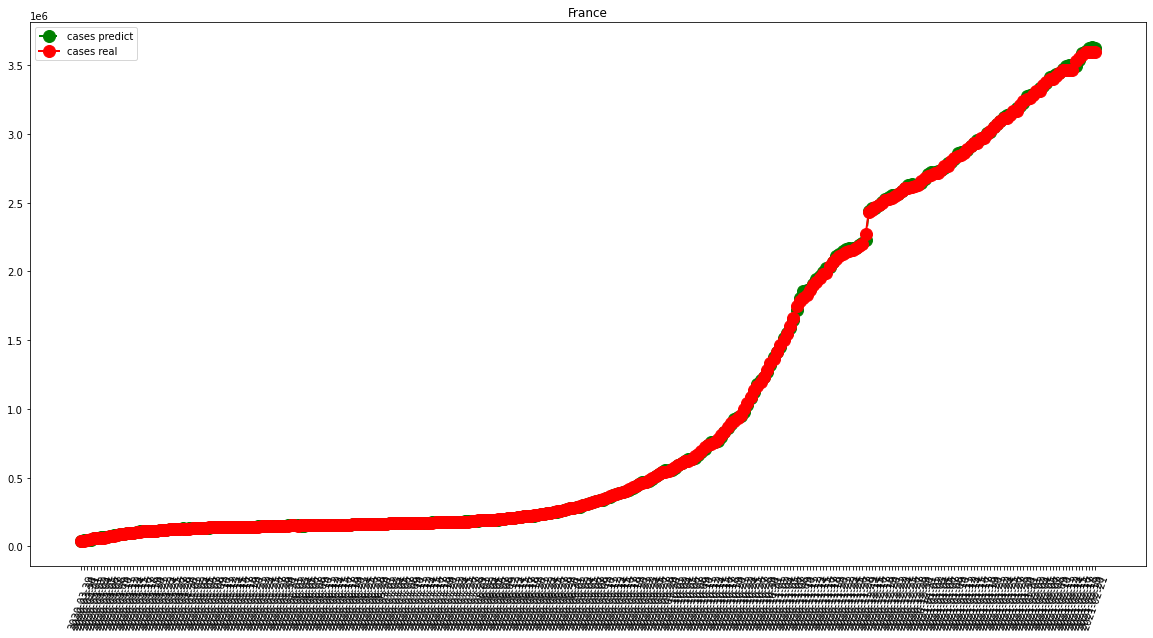

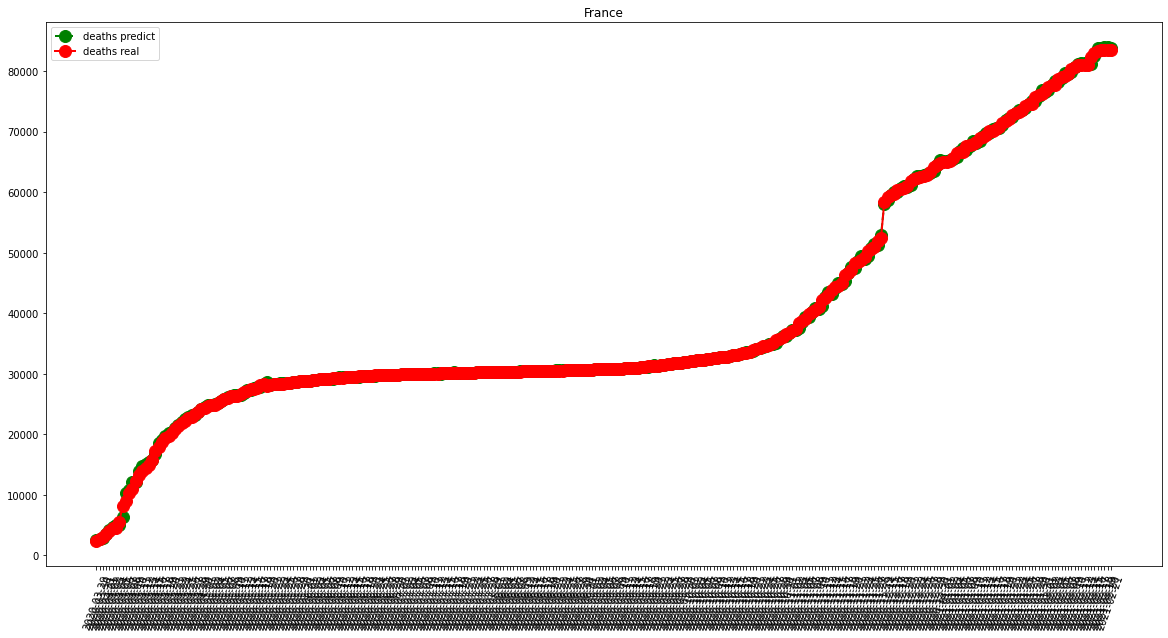

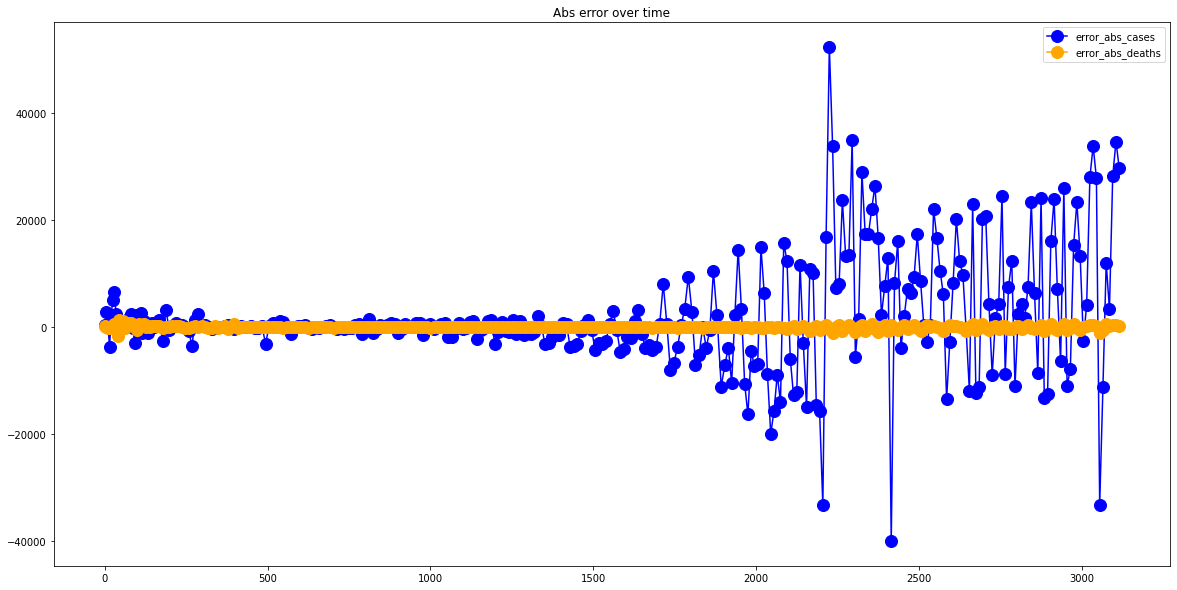

In [37]:
visShow("France")

-- Italy performances for cases --
MAE =  322.5978835978836
RMSE =  471.44954338473167
-- Italy performances for deaths --
MAE =  61.888888888888886
RMSE =  216.04209123498407


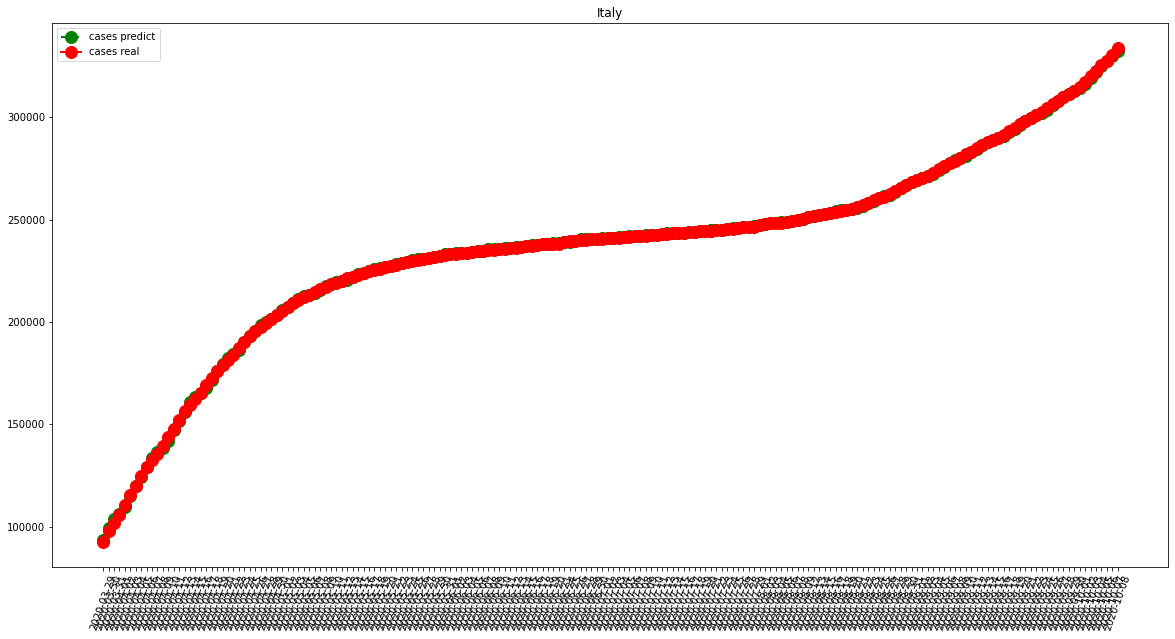

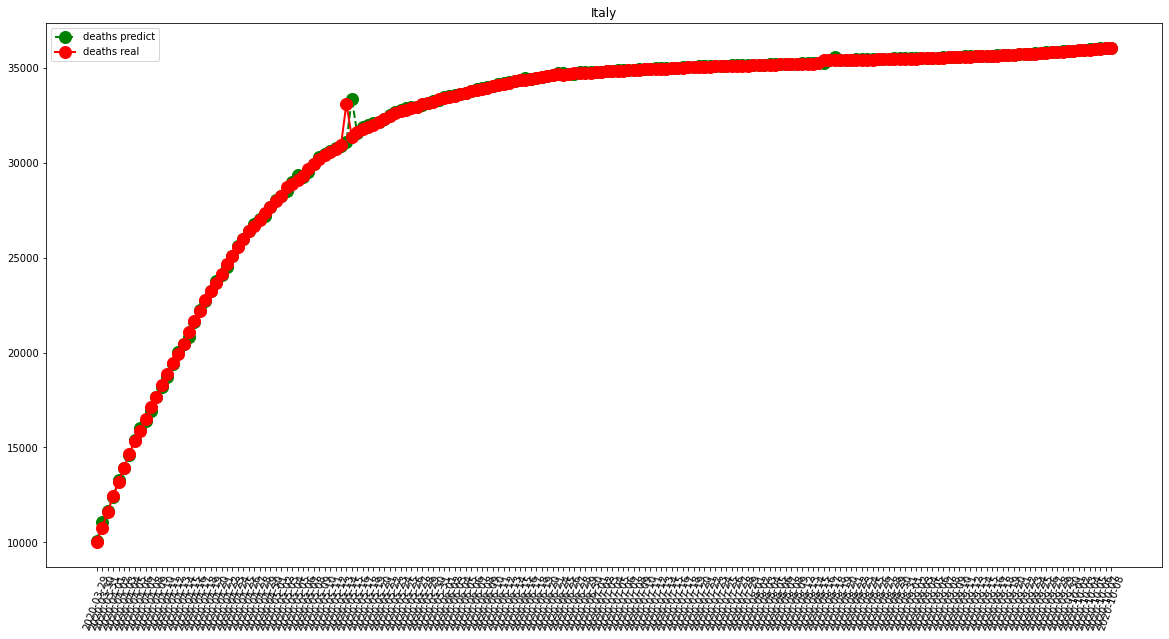

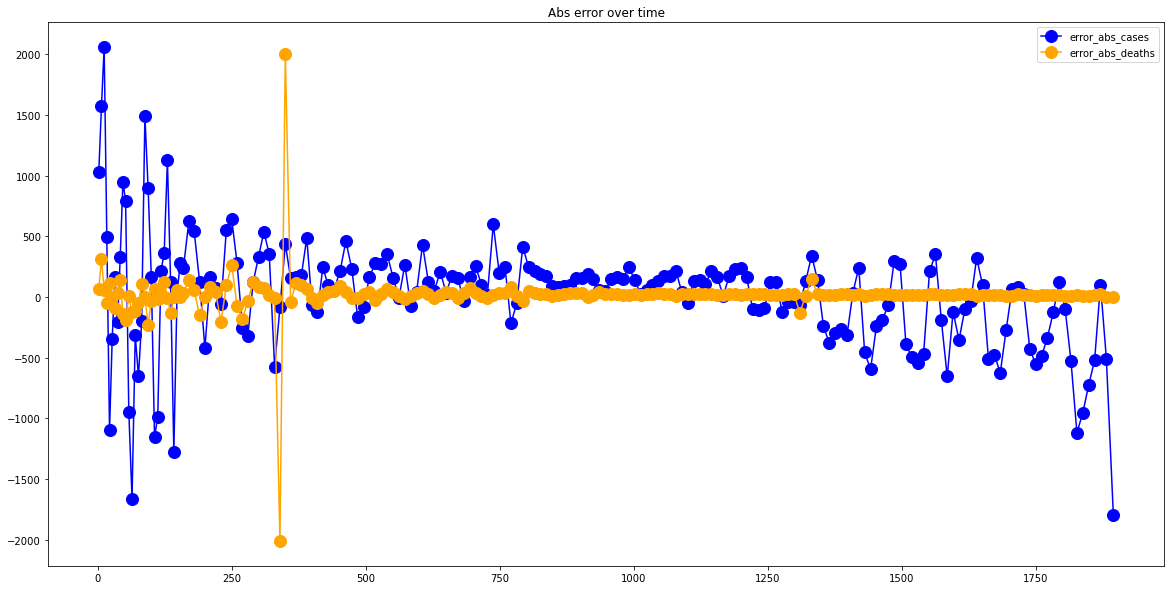

In [11]:
visShow("Italy")

In [1]:
# visShow("Belgium")

-- United States performances for cases --
MAE =  16943.640211640213
RMSE =  24022.7673790982
-- United States performances for deaths --
MAE =  475.4973544973545
RMSE =  661.1856874037076


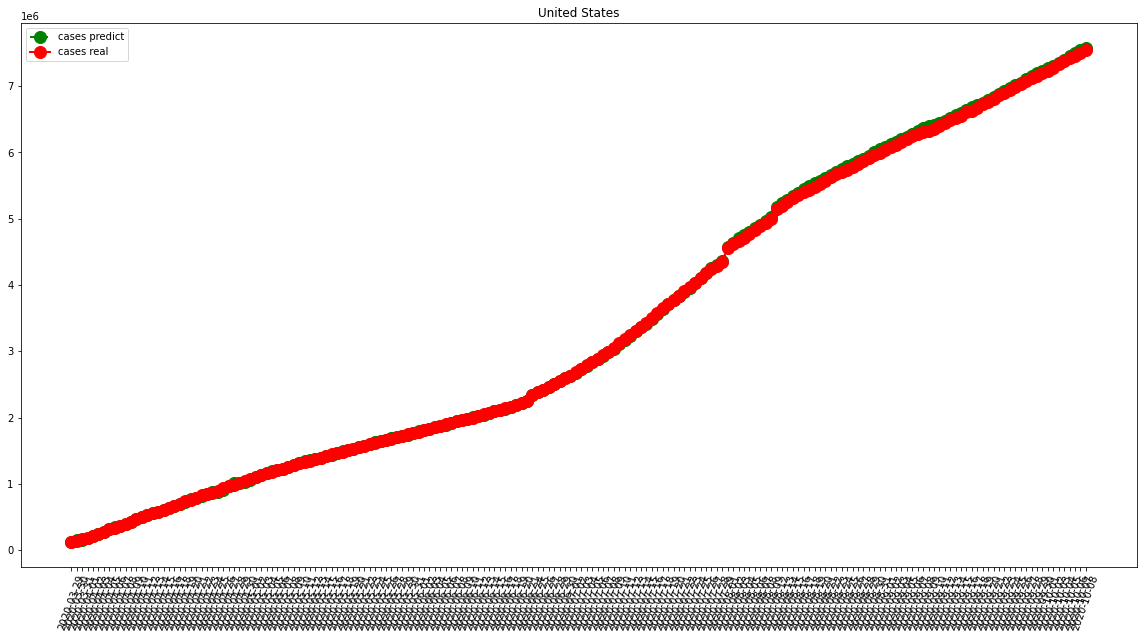

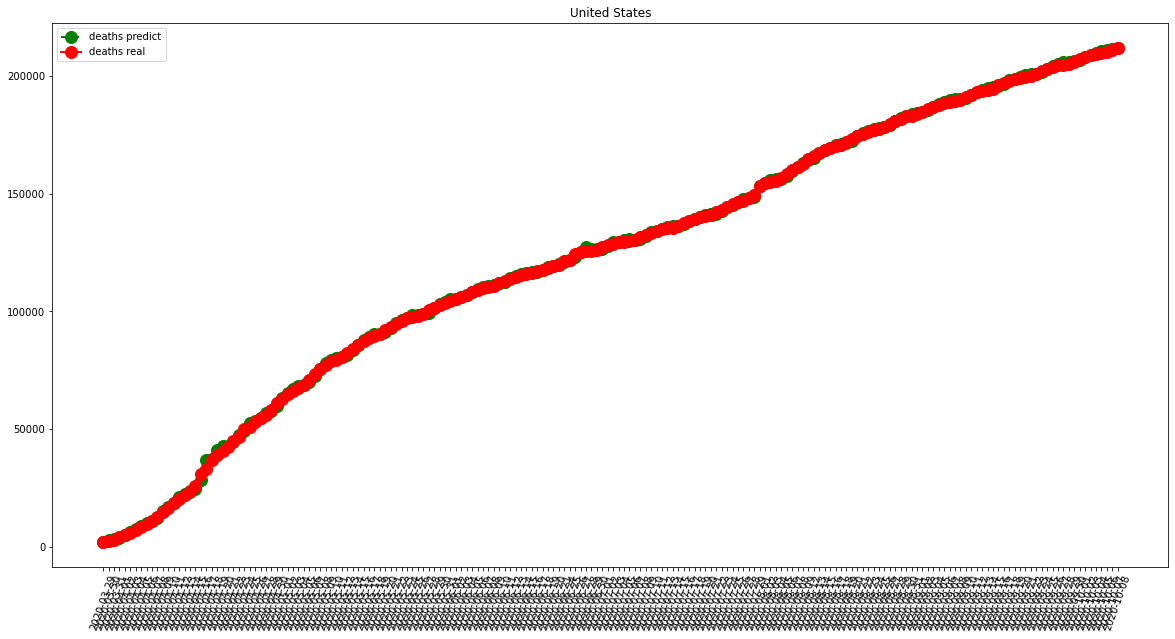

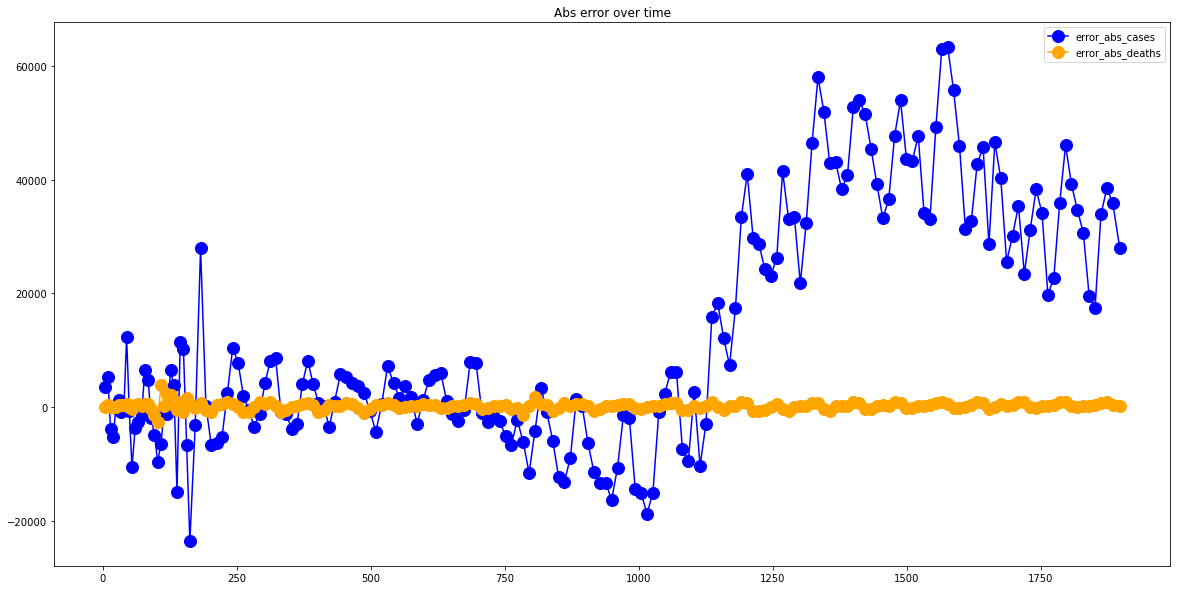

In [13]:
visShow("United States")

-- China performances for cases --
MAE =  60.53439153439153
RMSE =  105.11306585651764
-- China performances for deaths --
MAE =  23.005291005291006
RMSE =  114.23881974402543


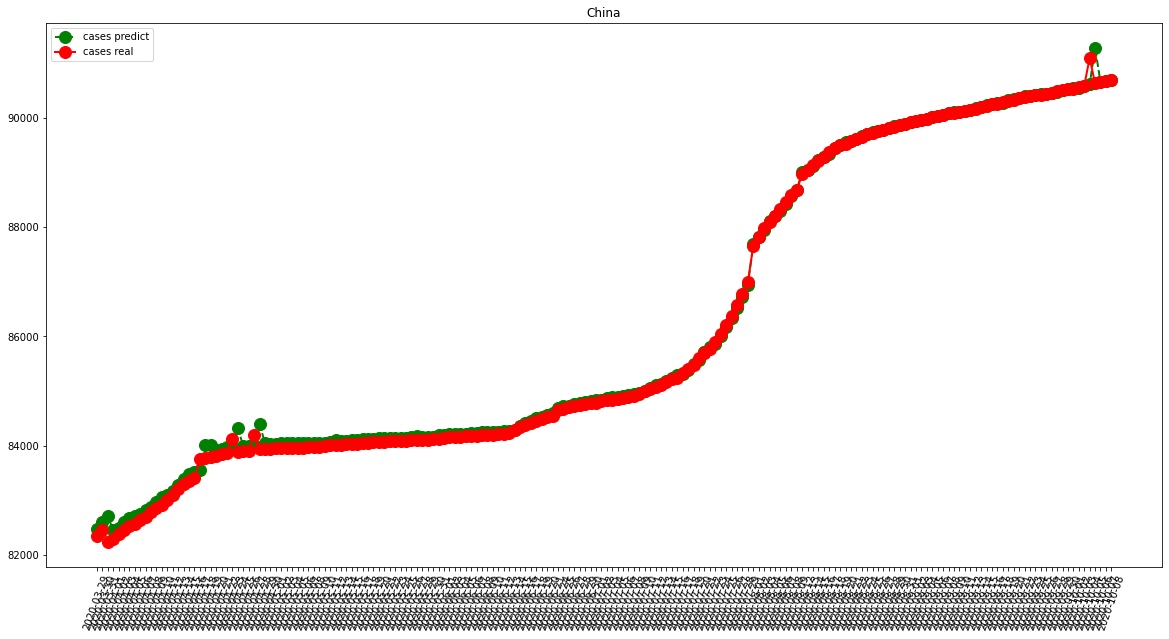

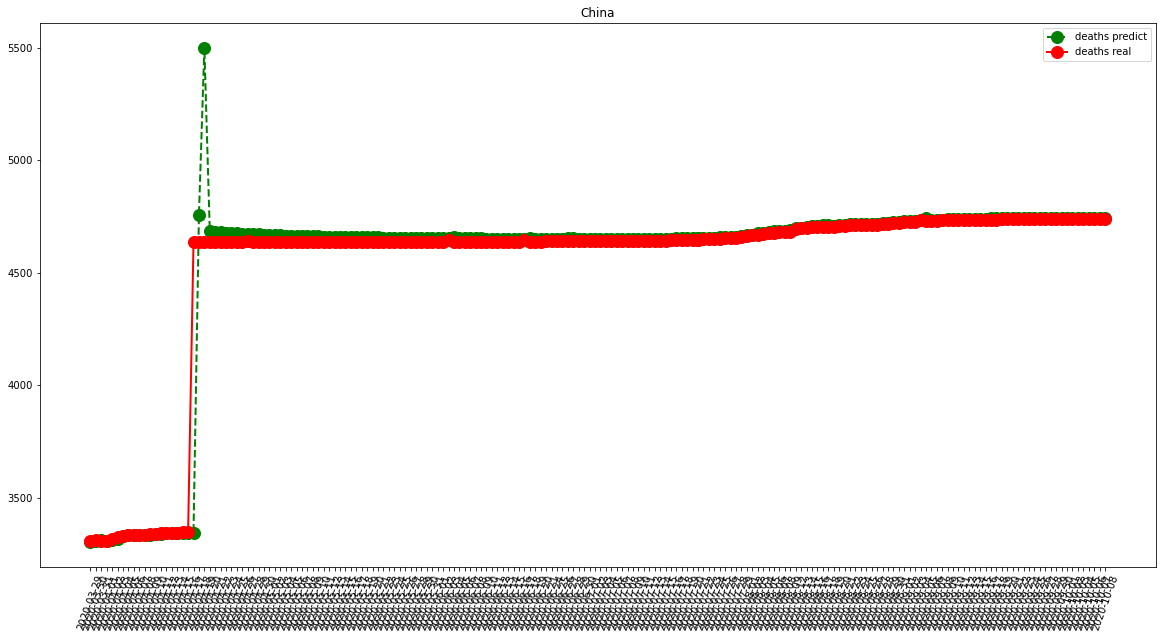

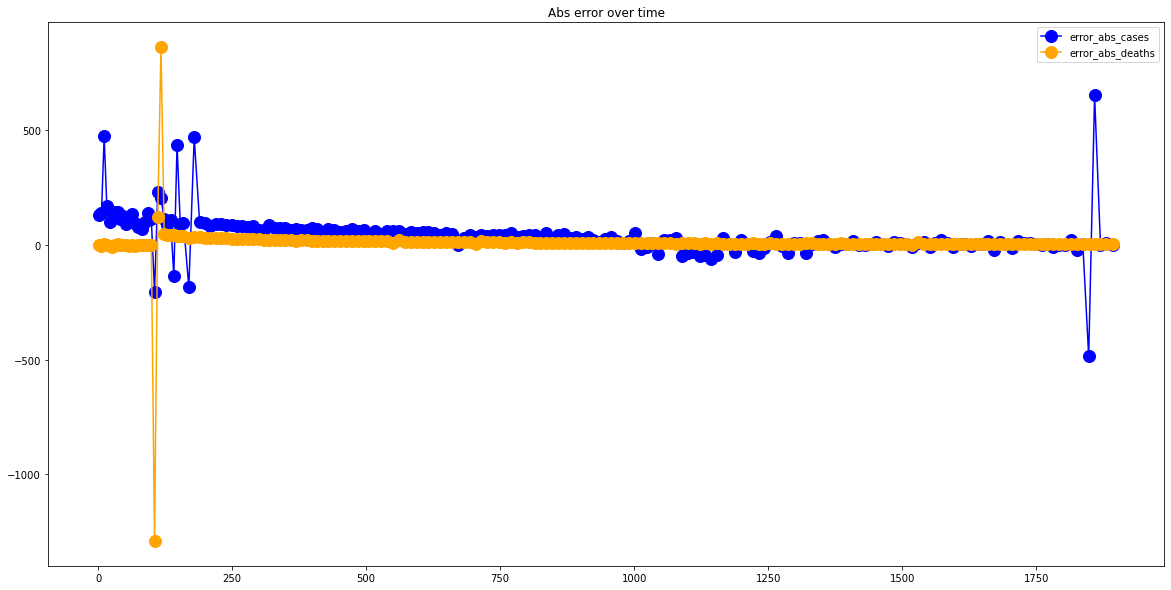

In [14]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1280.4099378881988
RMSE =  3733.7459916864705
-- United Kingdom performances for deaths --
MAE =  194.40372670807454
RMSE =  672.7445178783723


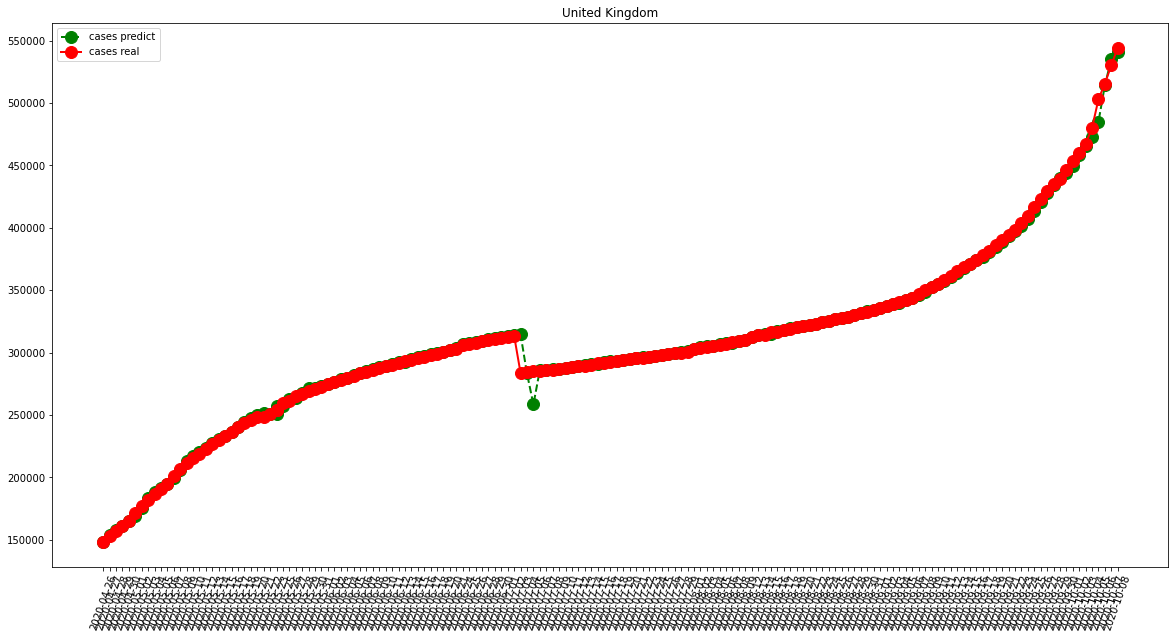

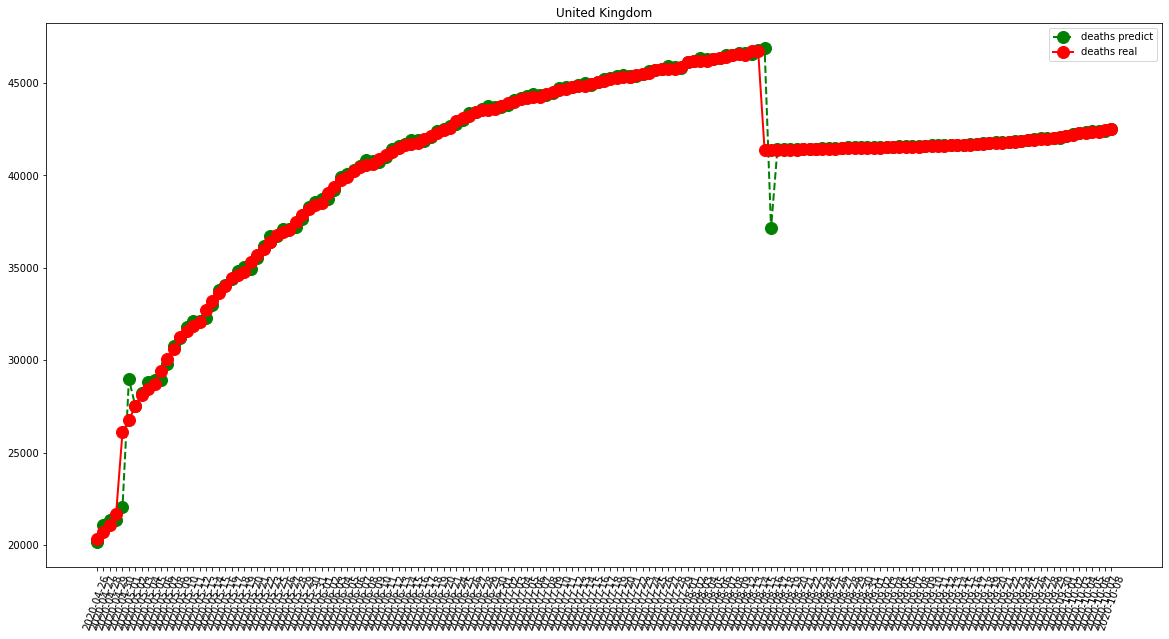

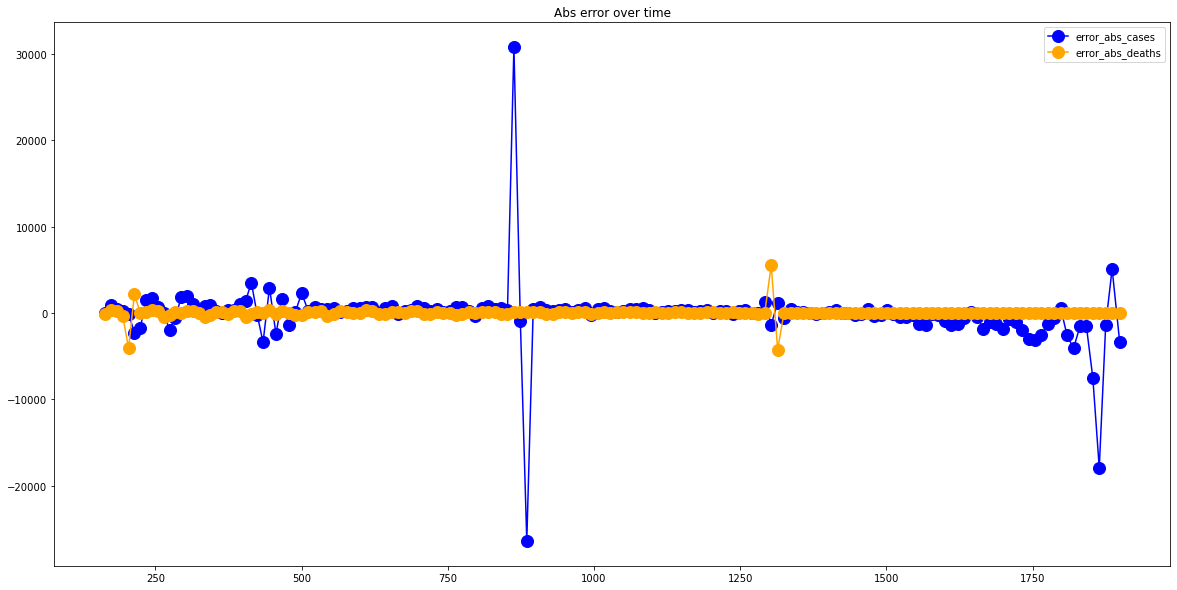

In [15]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  455.62111801242236
RMSE =  625.1871222987553
-- Germany performances for deaths --
MAE =  17.683229813664596
RMSE =  34.83260769747524


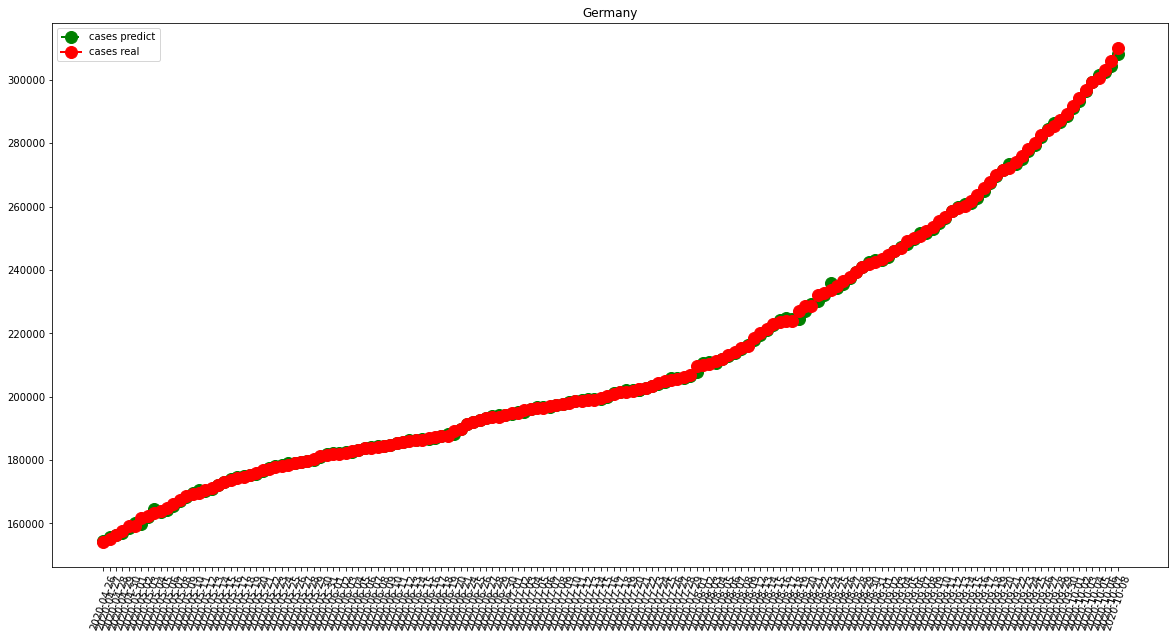

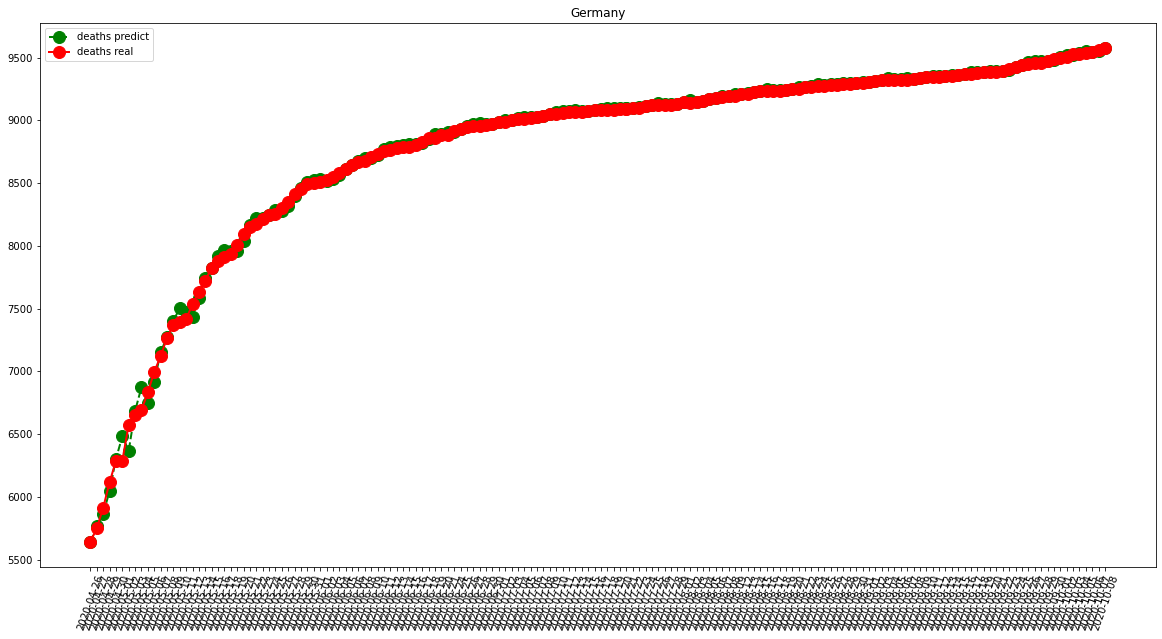

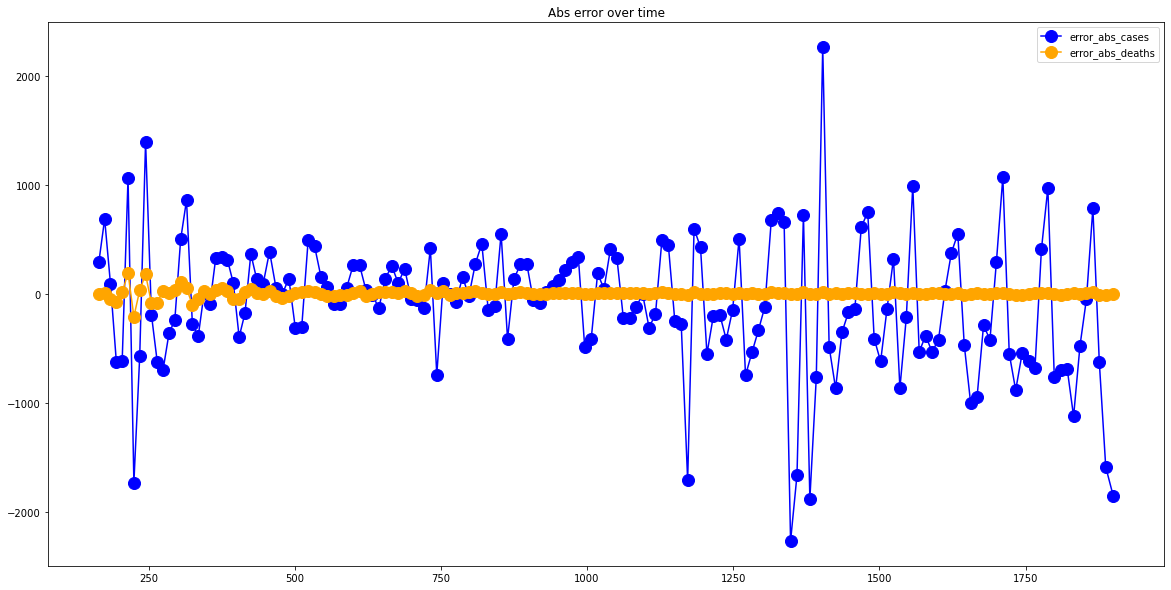

In [16]:
visShow("Germany")

-- Iran performances for cases --
MAE =  848.7391304347826
RMSE =  1185.1479321662812
-- Iran performances for deaths --
MAE =  48.962732919254655
RMSE =  81.21014072467636


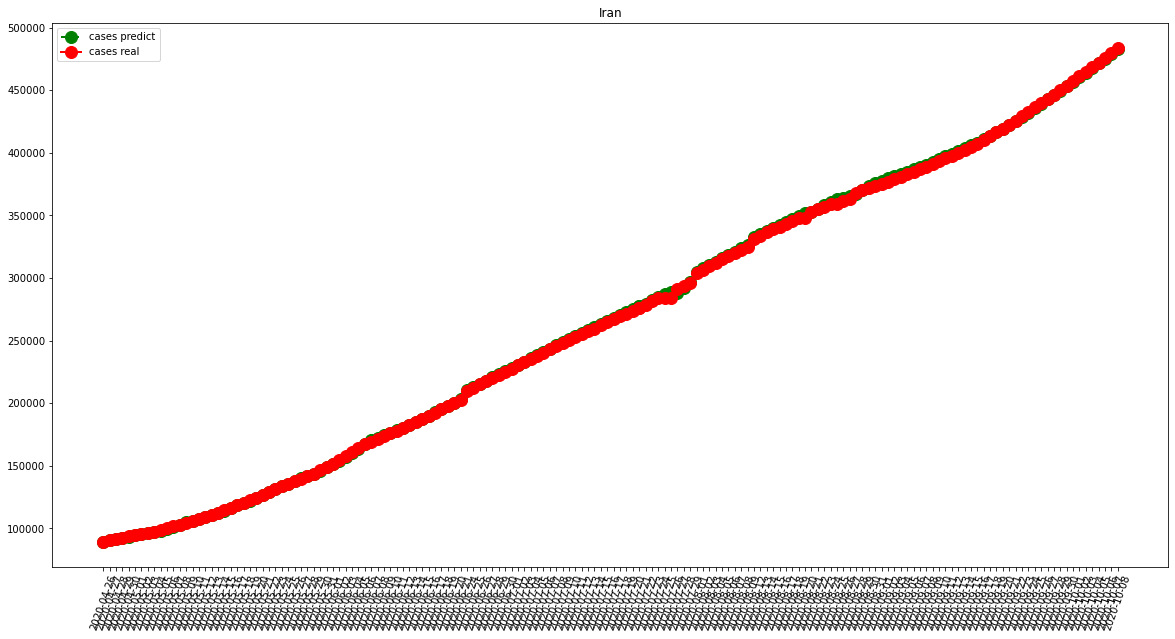

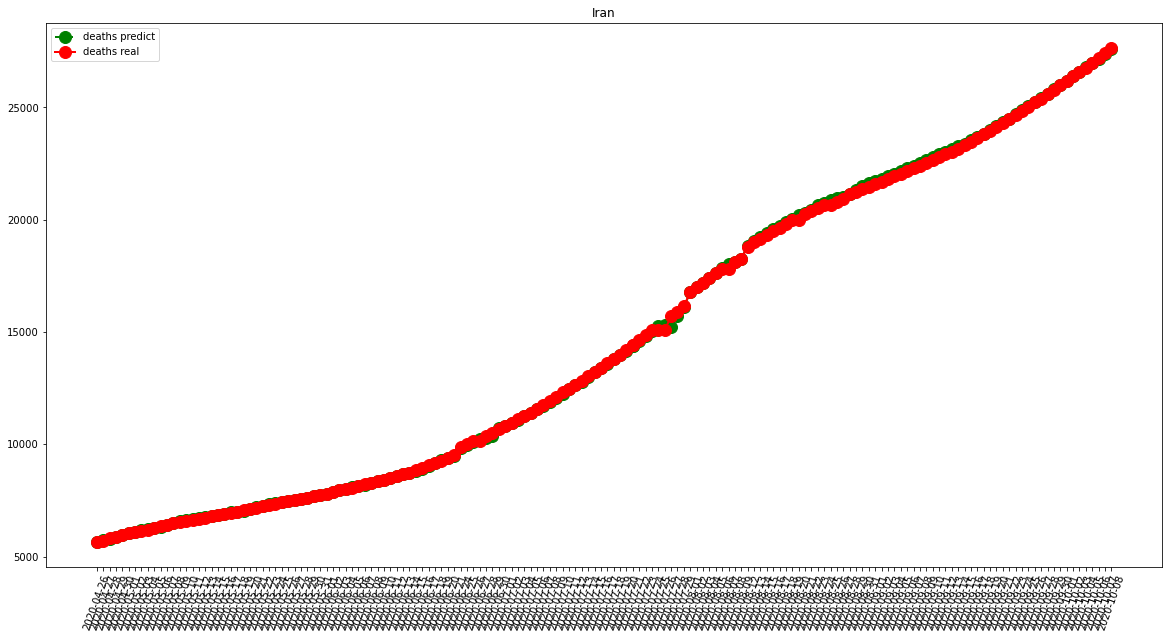

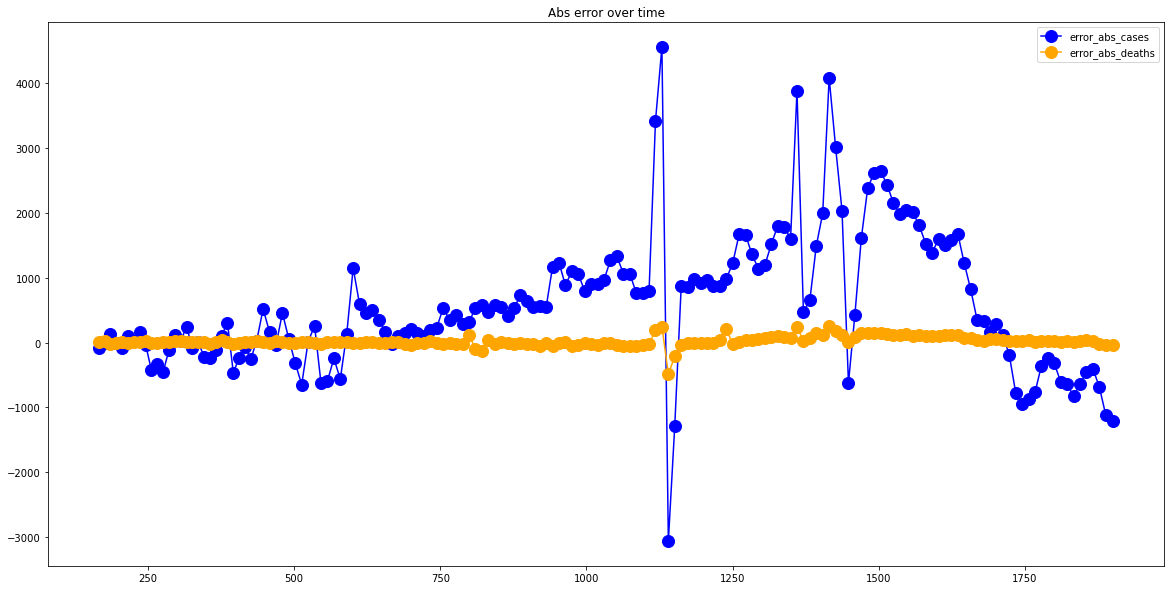

In [17]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  230.7826086956522
RMSE =  330.29476765515477
-- Turkey performances for deaths --
MAE =  15.347826086956522
RMSE =  80.2951465470125


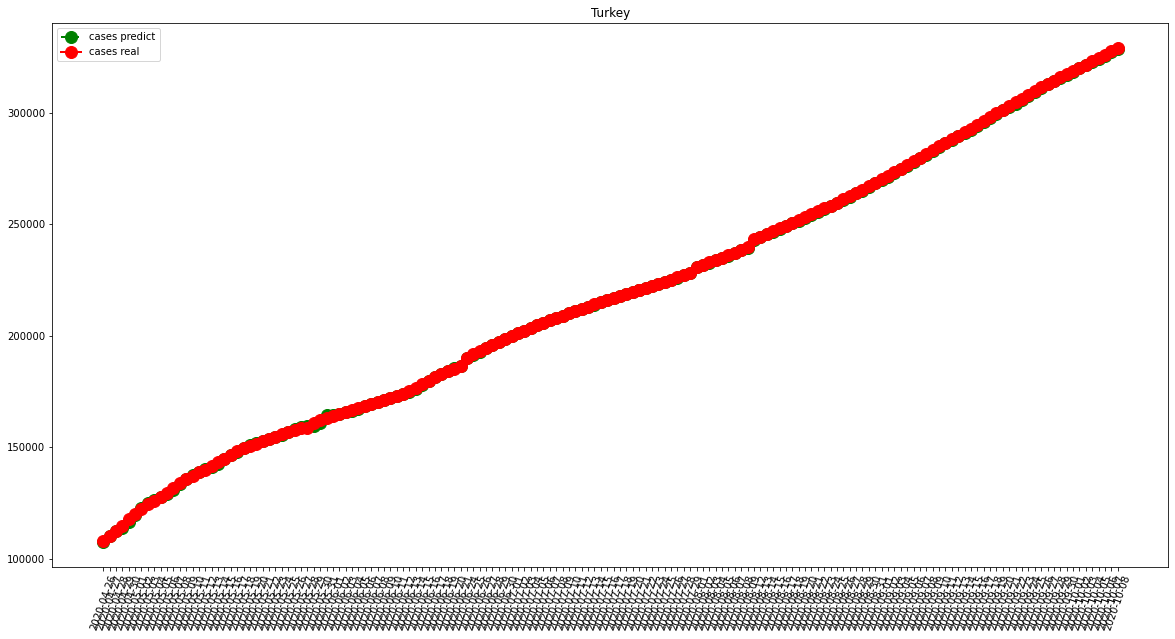

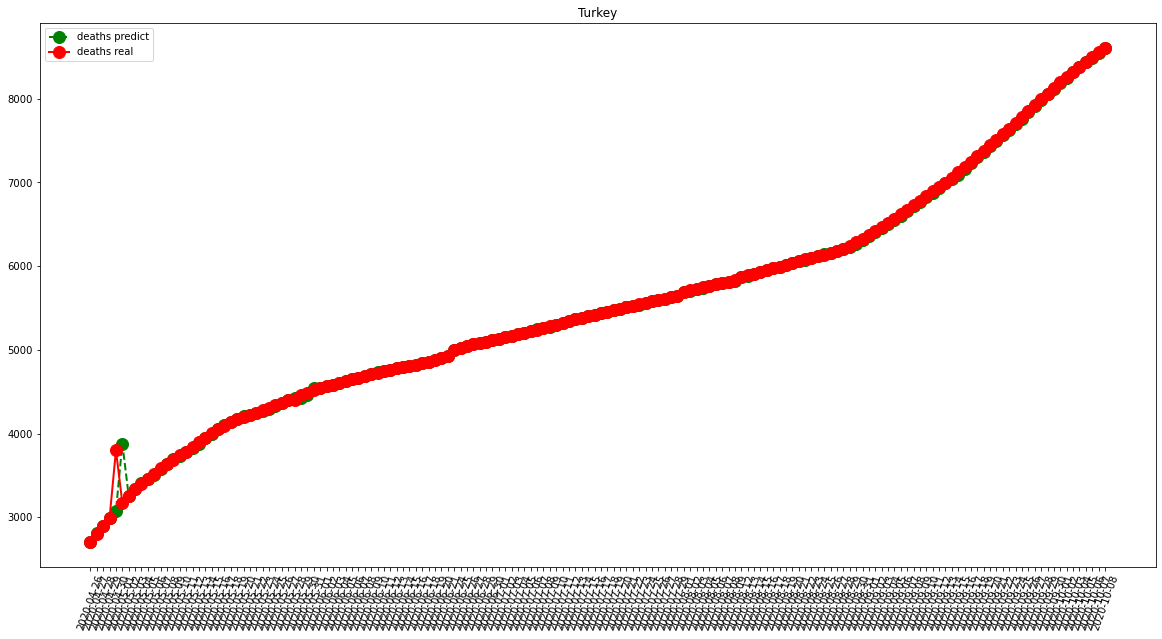

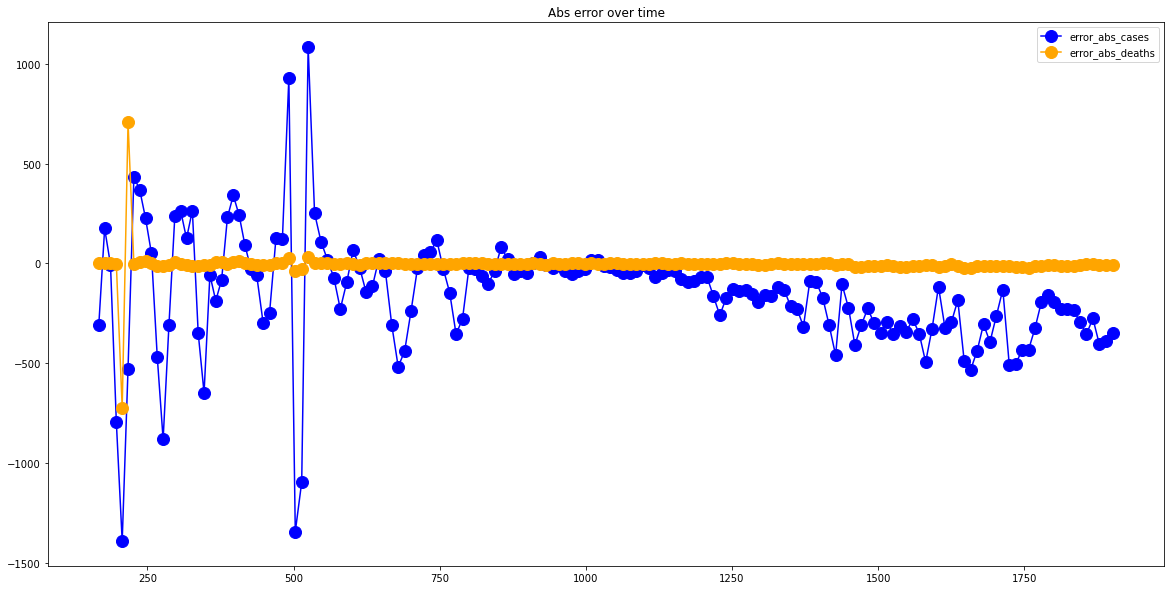

In [18]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17888.746268656716
RMSE =  22967.761011807885
-- Brazil performances for deaths --
MAE =  524.6119402985074
RMSE =  627.7619688641856


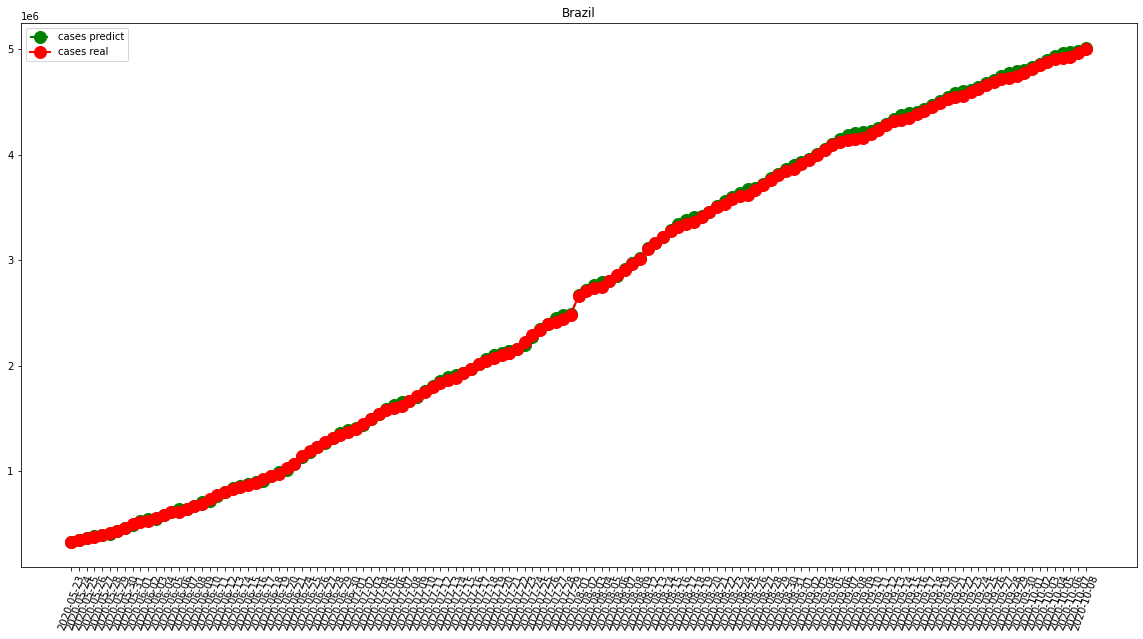

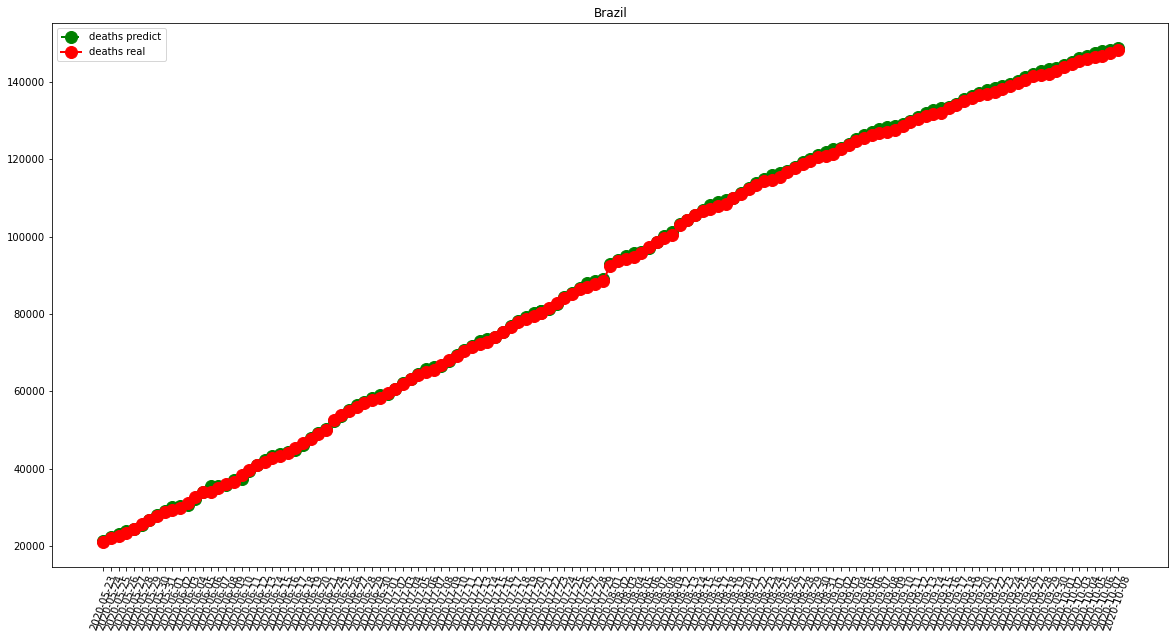

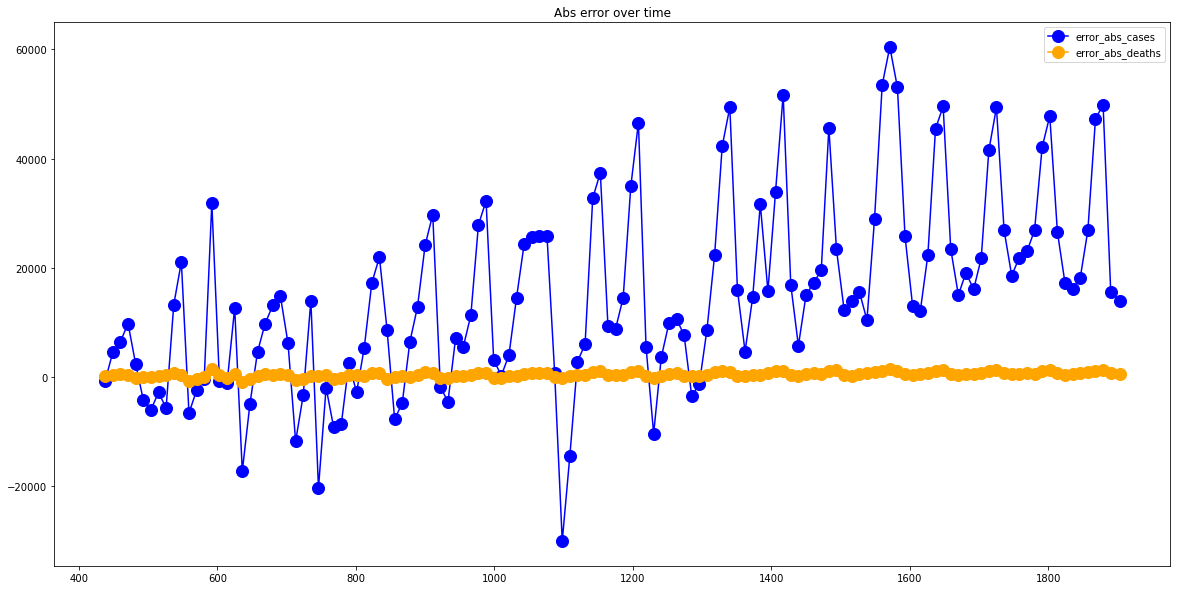

In [19]:
visShow("Brazil")

In [18]:
# frame.to_csv(f"data\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)